Uploading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Updated_bharwaraData.csv to Updated_bharwaraData.csv


# Version 2.0
1. Importing Libraries
2. Reading CSV
3. Preprocessing  
4. Plotting graphs before and after treatment of outliers
5. MISSING VALUES
6. Correlation Matrix and Graph
7. Linear Regression Model

## 1. Importing Libraries

In [ ]:
#importing libraries
import pandas as pd               
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from scipy.stats import pearsonr
import seaborn as sns

In [ ]:
from google.colab import files
up = files.upload()

Saving Updated_bharwaraData.csv to Updated_bharwaraData.csv


## 2. Reading CSV

In [ ]:
df = pd.read_csv(io.BytesIO(up['Updated_bharwaraData.csv']))
df.describe().to_csv("describes.csv")

after pre



In [ ]:
len(df["MLD_A"])

1171

In [ ]:


data = pd.read_csv("https://raw.githubusercontent.com/xambert/Coding-Practice/main/Codes/df_afterPreprocessing.csv")
data.describe().to_csv("afterdescribes.csv")

In [ ]:
len(df["MLD_B"])

1171

In [ ]:
len(df["MLD_C"])

1171

In [ ]:
df["MLD_A"] = df["MLD_A"]+df["MLD_B"]+df["MLD_C"]

In [ ]:
df.drop(columns = ["MLD_B", "MLD_C","IN_DO","Day","Date"],axis=1,inplace=True)
df.rename(columns = {"MLD_A": "MLD"},inplace=True)
df1 = df.copy()

In [ ]:
df1.head(3)
df1.describe()
#df1.describe().to_csv("summary_before.csv")

,MLD,IN_PH,IN_TSS,IN_COD,IN_BOD,IN_MPN,OUT_PH,OUT_DO,OUT_TSS,OUT_COD,OUT_BOD,OUT_MPN
count,1138.000000,1138.000000,1138.000000,1138.000000,1127.000000,9.270000e+02,1138.000000,1138.000000,1138.000000,1138.000000,1127.000000,916.000000
mean,329.958761,7.340299,227.488576,277.420914,141.159716,4.169375e+05,7.576520,4.530492,41.752197,72.536907,25.395741,4933.642308
std,39.295122,0.120948,38.166629,46.872302,22.371029,7.120741e+05,0.102997,1.178603,3.927903,9.863490,2.226416,3006.837926
min,157.110000,6.930000,139.000000,30.000000,75.000000,1.400000e+00,7.230000,4.000000,4.000000,6.000000,18.000000,0.036000
25%,320.035000,7.260000,204.000000,248.000000,128.000000,1.400000e+01,7.520000,4.300000,39.000000,64.000000,24.000000,3700.000000
50%,346.580000,7.340000,225.000000,272.000000,140.000000,2.570000e+01,7.590000,4.400000,42.000000,72.000000,26.000000,6000.000000
75%,349.617500,7.420000,251.000000,304.000000,155.000000,9.100000e+05,7.650000,4.700000,45.000000,80.000000,27.000000,6800.000000
max,437.930000,7.800000,556.000000,528.000000,450.000000,1.400000e+07,7.870000,43.000000,72.000000,96.000000,29.000000,9800.000000


## 3. Preprocessing  

## 3.a Preparing values of IN_MPN and OUT_MPN in terms of per lac [ No/100ml]

In [ ]:
def prep(x):
  if x> 1000:
    return x * 0.00001
  else:
    return x
    
df1["OUT_MPN"] = df1["OUT_MPN"].apply(lambda x: prep(x)).copy()
df1["IN_MPN"] = df1["IN_MPN"].apply(lambda x: prep(x)).copy()
#df1[df1["OUT_MPN"]==-1].sum()



In [ ]:
df1["OUT_MPN"].max()

0.1

In [ ]:
df1["IN_MPN"].max()

150.0

### 3.b Dropping rows with NaN values

In [ ]:
for col in df1.columns:
  print(col, df1[col].isnull().sum())

MLD 33
IN_PH 33
IN_TSS 33
IN_COD 33
IN_BOD 44
IN_MPN 244
OUT_PH 33
OUT_DO 33
OUT_TSS 33
OUT_COD 33
OUT_BOD 44
OUT_MPN 255


In [ ]:
df1.dropna(subset = ["MLD","IN_BOD"],inplace=True)
for col in df1.columns:
  print(col, df1[col].isnull().sum())

MLD 0
IN_PH 0
IN_TSS 0
IN_COD 0
IN_BOD 0
IN_MPN 207
OUT_PH 0
OUT_DO 0
OUT_TSS 0
OUT_COD 0
OUT_BOD 0
OUT_MPN 212


In [ ]:
xcols = ["MLD","IN_PH","IN_TSS", "IN_BOD","IN_COD"]
ycols = ["OUT_PH","OUT_DO","OUT_TSS"	,"OUT_COD"	,"OUT_BOD"]
xycols = xcols + ycols 


### 3.c Treating Outliers

In [ ]:
df2 = df1.copy() #for comparing outlier treatment 
for cols in xycols:
  for i in range(1,27):
    test = df2[df2["MonthCount"]==i][cols].copy()
    #quartile lower,middle, upper
    q1 = np.percentile(test,25,interpolation="midpoint")
    q2 = np.percentile(test,50,interpolation="midpoint")
    q3 = np.percentile(test, 75,interpolation="midpoint")
    #interquartile range
    iqr = q3 - q1
    #upper limit
    ul = q3 + 1.5 * iqr
    #lower limit
    ll = q1 - 1.5 * iqr
    #trimming method
    def elim(x):
      if x < ll or x > ul:
        return q2
      else:
        return x
    test = test.apply(lambda x: elim(x)).copy()
    df2.loc[df2["MonthCount"]==i, [cols]] = test

    # Need help in finding #of outliers when doing month wise outlier treatment

KeyError: ignored

### 3.c Treating Outlier-II

In [ ]:
#df3
df3 = df1.copy()
for cols in xycols:
    test = df3[cols].copy()
    #quartile lower,middle, upper
    q1 = np.percentile(test,25,interpolation="midpoint")
    q2 = np.percentile(test,50,interpolation="midpoint")
    q3 = np.percentile(test, 75,interpolation="midpoint")
    #interquartile range
    iqr = q3 - q1
    #upper limit
    ul = q3 + 1.5 * iqr
    #lower limit
    ll = q1 - 1.5 * iqr
    #trimming method
    def elim(x):
      if x < ll or x > ul:
        return q2
      else:
        return x
    test = test.apply(lambda x: elim(x)).copy()
    df3[cols] = test

## 4. Plotting graphs before and after treatment of outliers

In [ ]:
def plot3(xc, yc):
  fig , (ax1, ax2) = plt.subplots(2, sharex=True)
  ax1.set_title("Un-processed Data")
  ax1.plot(df1[xc],df1[yc],"o")
  ax1.set_ylabel(yc)
  ax2.set_title("After Outlier Treatment")
  ax2.plot(df2[xc],df2[yc],"o")
  ax2.set_ylabel(yc)
  m1, b1 = np.polyfit(df1[xc], df1[yc],1)
  m2, b2 = np.polyfit(df2[xc], df2[yc],1)
  ax1.plot(df1[xc], m1 * df1[xc] + b1)
  ax1.set_ylabel(yc)
  ax2.plot(df2[xc], m2 * df2[xc] + b2)
  ax2.set_ylabel(yc)
  fig.tight_layout()
  plt.savefig('/content/drive/MyDrive/resources/scatterplot/'+yc+'Scatter.png', dpi = 200)

In [ ]:
def plot2(xc, yc):
  plt.figure(figsize=(10,8))
  plt.title("Before Outlier Treatment")
  sns.boxplot(x=xc, y=yc,data=df1)
  plt.savefig('/content/drive/MyDrive/resources/'+yc+'BeforeOutlier.png', dpi = 200)
  plt.figure(figsize=(10,6))
  plt.title("After Outlier Treatment")
  sns.boxplot(x=xc,y =yc, data = df2)
  plt.savefig('/content/drive/MyDrive/resources/'+yc+'AfterOutlier.png', dpi = 200)
  #fig.suptitle("Testing side by side graphs for "+ yc)


###Box plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

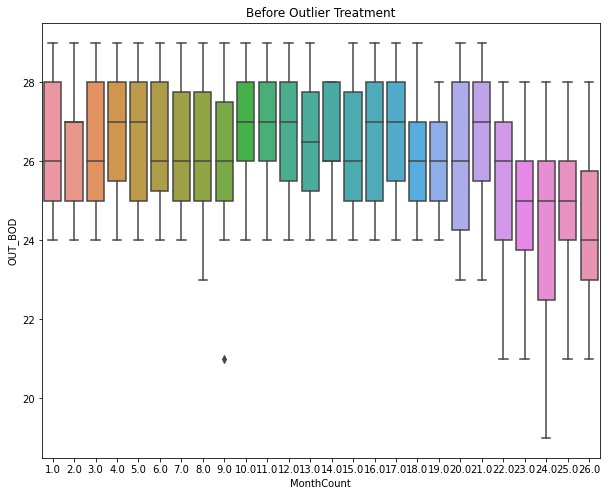

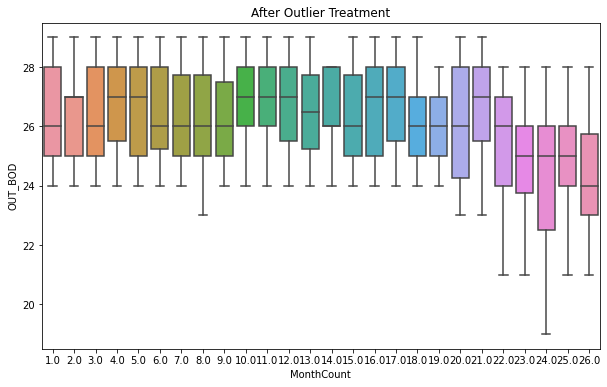

In [ ]:
#@title Choosing datafield

xc = "MonthCount" #@param ["MonthCount"]
yc = "OUT_BOD" #@param ["MLD","IN_PH","IN_TSS", "IN_BOD","IN_COD", "OUT_PH","OUT_DO","OUT_TSS"	,"OUT_COD"	,"OUT_BOD"] 
plot2(xc, yc)


###Scatter plot


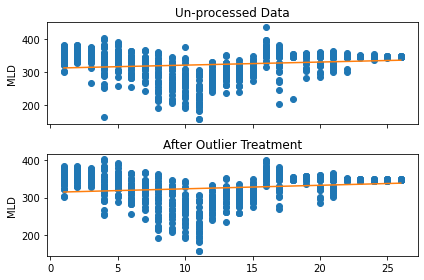

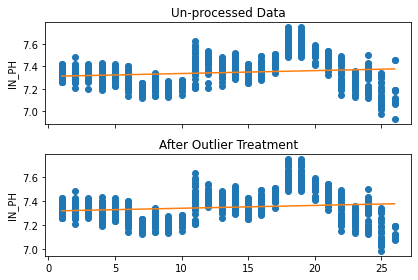

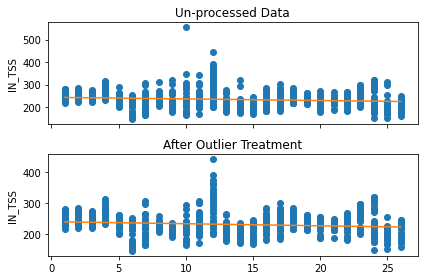

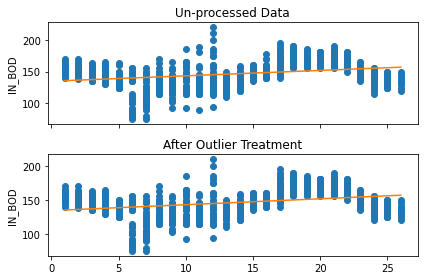

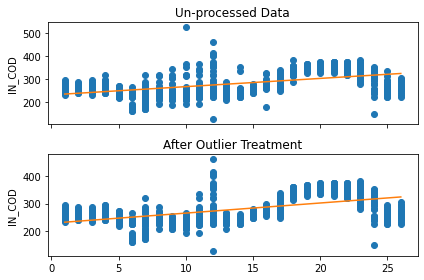

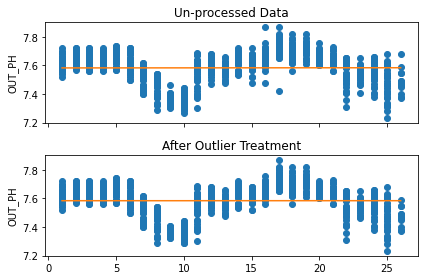

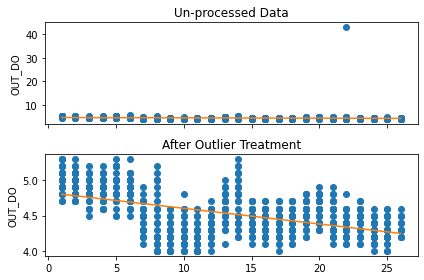

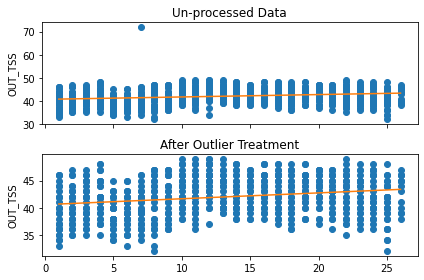

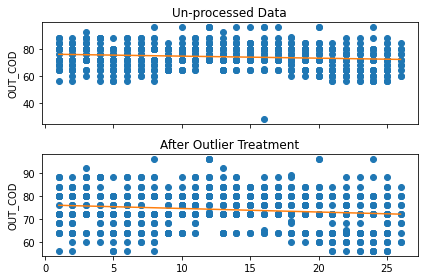

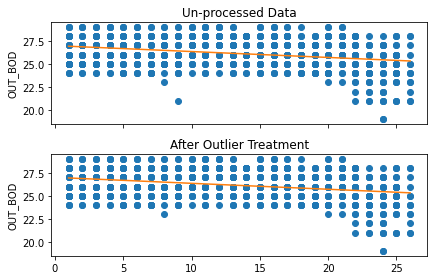

In [ ]:
#@title Choosing datafield

xc = "MonthCount" #@param ["MonthCount"]
for yc in ["MLD","IN_PH","IN_TSS", "IN_BOD","IN_COD", "OUT_PH","OUT_DO","OUT_TSS"	,"OUT_COD"	,"OUT_BOD"]:
  plot3(xc, yc)

In [ ]:
df4 = df3.copy()

## 5. MISSING VALUES

### 5.a Using Mean

In [ ]:
m1 = np.nanmean(df2["IN_MPN"])
m2 = np.nanmean(df2["OUT_MPN"])
df2["IN_MPN"].replace(np.nan, m1,inplace=True)
df2["OUT_MPN"].replace(np.nan, m2,inplace=True)
df2.isnull().sum()

MLD        0
IN_PH      0
IN_TSS     0
IN_COD     0
IN_BOD     0
IN_MPN     0
OUT_PH     0
OUT_DO     0
OUT_TSS    0
OUT_COD    0
OUT_BOD    0
OUT_MPN    0
dtype: int64

In [ ]:
for cols in ["IN_MPN", "OUT_MPN"]:
  for i in range(1,27):
    test = df2[df2["MonthCount"]==i][cols].copy()
    #quartile lower,middle, upper
    q1 = np.percentile(test,25,interpolation="midpoint")
    q2 = np.percentile(test,50,interpolation="midpoint")
    q3 = np.percentile(test, 75,interpolation="midpoint")
    #interquartile range
    iqr = q3 - q1
    #upper limit
    ul = q3 + 1.5 * iqr
    #lower limit
    ll = q1 - 1.5 * iqr
    #trimming method
    def elim(x):
      if x < ll or x > ul:
        return q2
      else:
        return x
    test = test.apply(lambda x: elim(x)).copy()
    df2.loc[df2["MonthCount"]==i, [cols]] = test

Normalization

In [ ]:
#normalization of training set
xcols = xcols + ["IN_MPN"]
def minmax(df, xcols):
  X = df[xcols].copy()
  for column in X.columns:
    X[column] = (X[column] - X[column].min())/(X[column].max() - X[column].min())
  return X
df2[xcols] = minmax(df2, xcols).copy()
df_disp1 = df2.describe()
df_disp1.T
#df["MonthCount"].unique

,count,mean,std,min,25%,50%,75%,max
MLD,1126.0,0.616344,0.140255,0.000,0.583719,0.674827,0.685795,1.00
IN_PH,1126.0,0.473633,0.137337,0.000,0.379310,0.471264,0.563218,1.00
IN_TSS,1126.0,0.212618,0.091639,0.000,0.156475,0.207434,0.268585,1.00
IN_COD,1126.0,0.497166,0.094424,0.000,0.437751,0.485944,0.550201,1.00
IN_BOD,1126.0,0.176374,0.059657,0.000,0.141333,0.173333,0.213333,1.00
IN_MPN,1126.0,0.101730,0.071832,0.000,0.060403,0.093960,0.121141,1.00
OUT_PH,1126.0,7.577806,0.101791,7.230,7.520000,7.590000,7.650000,7.87
OUT_DO,1126.0,4.530995,1.184563,4.000,4.300000,4.400000,4.700000,43.00
OUT_TSS,1126.0,41.790409,3.776717,28.000,39.000000,42.000000,45.000000,72.00
OUT_COD,1126.0,72.560391,9.863756,6.000,64.000000,72.000000,80.000000,96.00


### 5.b Using KNN


In [ ]:
#xcols += ["IN_MPN"]
ycols += ["OUT_MPN"]

In [ ]:
from sklearn.impute import KNNImputer
imputer_in = KNNImputer(n_neighbors = len(xcols))
imputer_out = KNNImputer(n_neighbors = len(ycols))
df4[xcols] = imputer_in.fit_transform(df4[xcols])
df4[ycols] = imputer_out.fit_transform(df4[ycols])
df4.head(3)  


,MLD,IN_PH,IN_TSS,IN_COD,IN_BOD,IN_MPN,OUT_PH,OUT_DO,OUT_TSS,OUT_COD,OUT_BOD,OUT_MPN
0,340.0,7.37,267.0,280.0,160.0,10.483333,7.59,5.1,39.0,88.0,29.0,0.067667
1,302.0,7.32,254.0,264.0,160.0,11.700000,7.64,5.2,36.0,72.0,25.0,0.077167
2,361.0,7.28,246.0,240.0,150.0,12.900000,7.66,5.0,36.0,80.0,27.0,0.057667


In [ ]:
for cols in ["IN_MPN", "OUT_MPN"]:
    test = df4[cols].copy()
    #quartile lower,middle, upper
    q1 = np.percentile(test,25,interpolation="midpoint")
    q2 = np.percentile(test,50,interpolation="midpoint")
    q3 = np.percentile(test, 75,interpolation="midpoint")
    #interquartile range
    iqr = q3 - q1
    #upper limit
    ul = q3 + 1.5 * iqr
    #lower limit
    ll = q1 - 1.5 * iqr
    #trimming method
    def elim(x):
      if x < ll or x > ul:
        return q2
      else:
        return x
    test = test.apply(lambda x: elim(x)).copy()
    df4[cols] = test

In [ ]:
#normalization of df4
def minmax(df, xcols):
  X = df[xcols].copy()
  for column in X.columns:
    X[column] = (X[column] - X[column].min())/(X[column].max() - X[column].min())
  return X
df4[xcols] = minmax(df4, xcols).copy()
df_disp = df4.describe()
df_disp.T
#df["MonthCount"].unique

,count,mean,std,min,25%,50%,75%,max
MLD,1126.0,0.549475,0.171869,0.000,0.564583,0.594333,0.620635,1.00
IN_PH,1126.0,0.497488,0.173714,0.000,0.375000,0.500000,0.609375,1.00
IN_TSS,1126.0,0.480435,0.188999,0.000,0.360497,0.476519,0.607735,1.00
IN_COD,1126.0,0.516757,0.200159,0.000,0.381818,0.490909,0.636364,1.00
IN_BOD,1126.0,0.496796,0.180493,0.000,0.392523,0.485981,0.626168,1.00
IN_MPN,1126.0,0.389504,0.190931,0.000,0.239193,0.317003,0.494837,1.00
OUT_PH,1126.0,7.582673,0.093618,7.330,7.530000,7.590000,7.650000,7.82
OUT_DO,1126.0,4.492451,0.286691,4.000,4.300000,4.400000,4.600000,5.30
OUT_TSS,1126.0,41.776199,3.644613,30.000,39.000000,42.000000,45.000000,49.00
OUT_COD,1126.0,72.658082,9.569830,40.000,64.000000,72.000000,80.000000,96.00


In [ ]:
df4.to_csv("df_afterPreprocessing.csv", index=False)
df4.describe().to_csv("summary_after.csv",index=False)


In [ ]:
df4

,MLD,IN_PH,IN_TSS,IN_COD,IN_BOD,IN_MPN,OUT_PH,OUT_DO,OUT_TSS,OUT_COD,OUT_BOD,OUT_MPN
0,0.535850,0.546875,0.707182,0.527273,0.672897,0.273295,7.59,5.1,39.0,88.0,29.0,0.067667
1,0.199894,0.468750,0.635359,0.454545,0.672897,0.308357,7.64,5.2,36.0,72.0,25.0,0.077167
2,0.721510,0.406250,0.591160,0.345455,0.579439,0.342939,7.66,5.0,36.0,80.0,27.0,0.057667
3,0.845283,0.546875,0.696133,0.490909,0.532710,0.343900,7.60,5.1,39.0,64.0,24.0,0.060500
4,0.880647,0.625000,0.629834,0.454545,0.485981,0.308357,7.69,4.9,42.0,72.0,26.0,0.071000
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,0.615419,0.437500,0.430939,0.490909,0.439252,0.541787,7.60,4.5,41.0,68.0,25.0,0.060000
1155,0.593493,0.453125,0.342541,0.418182,0.299065,0.521614,7.55,4.3,40.0,64.0,22.0,0.036000
1156,0.581823,0.421875,0.309392,0.418182,0.252336,0.440922,7.57,4.1,39.0,72.0,25.0,0.055000
1157,0.592963,0.500000,0.320442,0.454545,0.345794,0.432277,7.59,4.3,44.0,76.0,23.0,0.061000


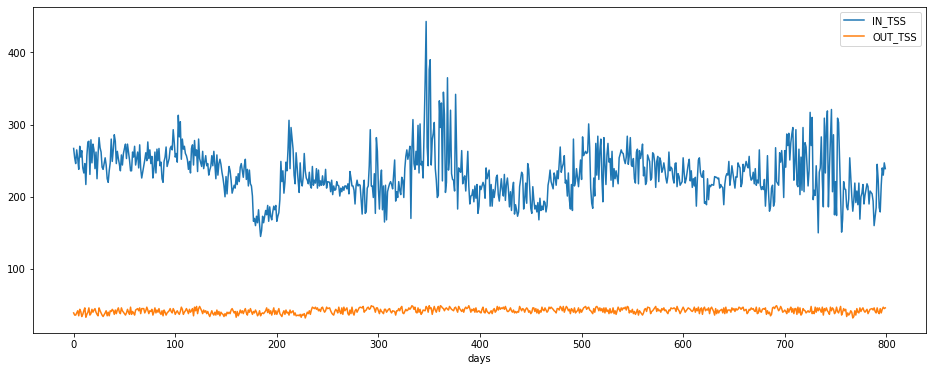

In [ ]:
df4["IN_TSS"].plot(figsize=(16,6))
df4["OUT_TSS"].plot(figsize=(16,6))
plt.xlabel("days")
plt.legend()
plt.savefig('TSS.png', dpi = 200)

In [ ]:
df4["IN_DO"].plot(figsize=(16,6))
df4["OUT_DO"].plot(figsize=(16,6))
plt.xlabel("days")
plt.legend()
plt.savefig('TSS.png', dpi = 200)

KeyError: ignored

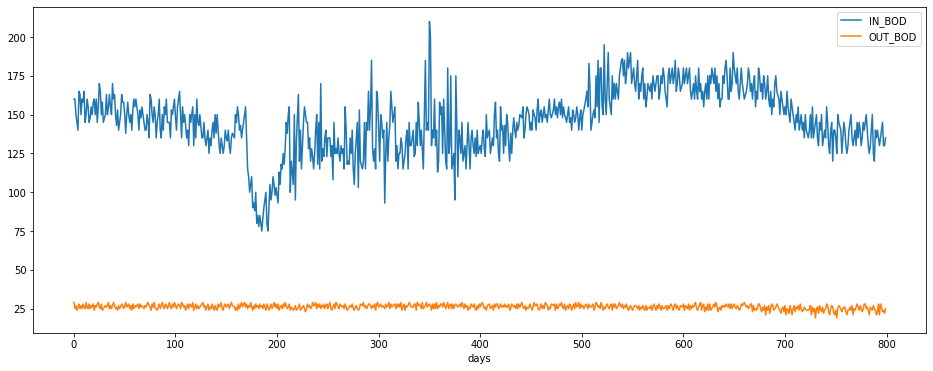

In [ ]:
df4["IN_BOD"].plot(figsize=(16,6))
df4["OUT_BOD"].plot(figsize=(16,6))
plt.xlabel("days")
plt.legend()
plt.savefig('BOD.png', dpi = 200)

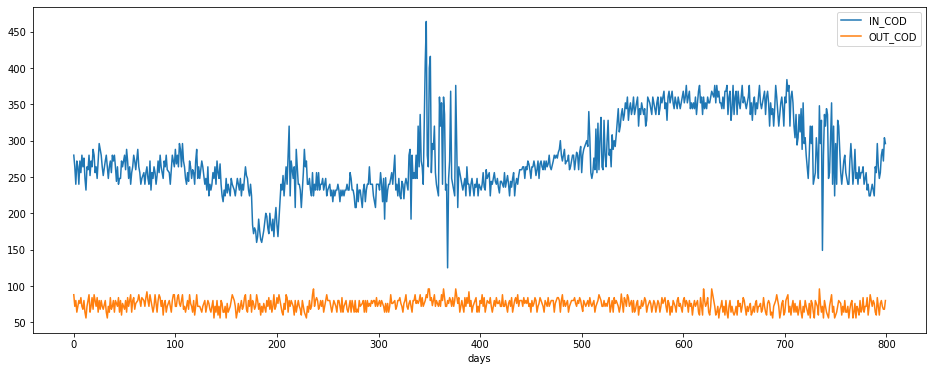

In [ ]:
df4["IN_COD"].plot(figsize=(16,6))
df4["OUT_COD"].plot(figsize=(16,6))
plt.xlabel("days")
plt.legend()
plt.savefig('COD.png', dpi = 200)

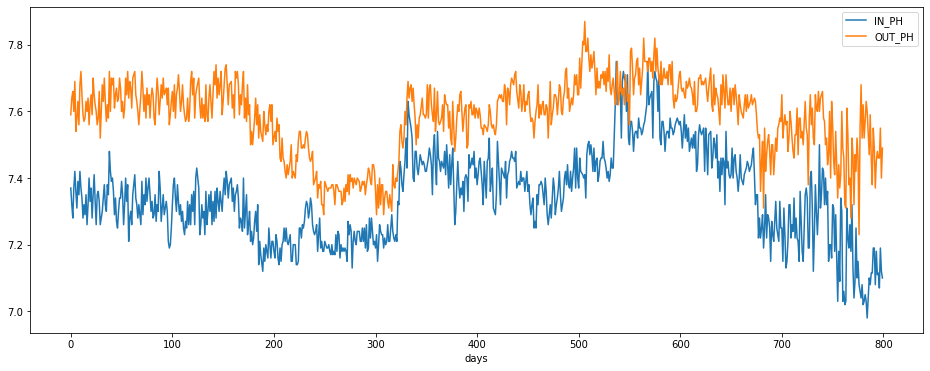

In [ ]:
df4["IN_PH"].plot(figsize=(16,6))
df4["OUT_PH"].plot(figsize=(16,6))
plt.xlabel("days")
plt.legend()
plt.savefig('PH.png', dpi = 200)

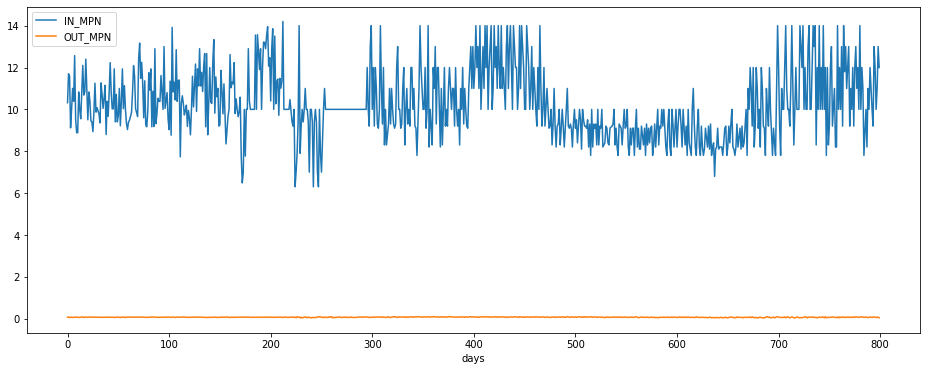

In [ ]:
df4["IN_MPN"].plot(figsize=(16,6))
df4["OUT_MPN"].plot(figsize=(16,6))
plt.xlabel("days")
plt.legend()
plt.savefig('MPN.png', dpi = 200)

Normalization

#### Plotting Graph : Before and After Normalization --- TWO TABLES


In [ ]:
def plot4(xc, yc):
  fig , (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
  ax1.plot(df1[xc],df1[yc],"o")
  ax2.plot(df2[xc],df2[yc],"o")
  ax3.plot(df4[xc],df4[yc],"o")
  m1, b1 = np.polyfit(df1[xc], df1[yc],1)
  m2, b2 = np.polyfit(df2[xc], df2[yc],1)
  m3, b3 = np.polyfit(df4[xc], df4[yc],1)
  ax1.set_title("Un-processed Data")
  ax1.plot(df1[xc], m1 * df1[xc] + b1)
  ax2.set_title("Missing Value treatment usin Mean")
  ax2.plot(df2[xc], m2 * df2[xc] + b2)
  ax3.set_title("Missing Value treatment using KNN")
  ax3.plot(df4[xc], m3 * df4[xc] + b3)
  ax1.set_ylabel(yc)
  ax2.set_ylabel(yc)
  ax3.set_ylabel(yc)
  plt.xlabel("Month Count")
  fig.tight_layout()
  plt.savefig('/content/drive/MyDrive/resources/dataPreprocessing.png', dpi = 200)

MonthCount OUT_MPN


FileNotFoundError: ignored

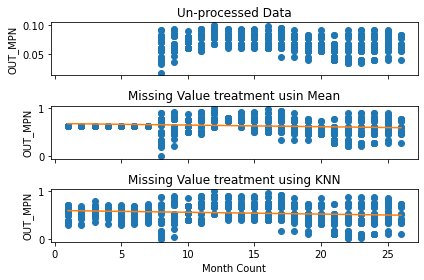

In [ ]:
#@title IN_MPN, OUT_MPN

xc = "MonthCount" #@param ["MonthCount"]
yc = "OUT_MPN" #@param ["IN_MPN", "OUT_MPN"] 
print(xc,yc)
plot4(xc, yc)

## 6. Correlation Matrix and Graph

In [ ]:
correlation = df4.corr()

moderate=[]
strong=[]
weak = []
for col in correlation.columns:
  for col2 in correlation.columns:
    if col!=col2:
      if 0.25 < abs(correlation[col][col2]) <= 0.5:
        weak.append([col, col2])
      elif 0.5 < abs(correlation[col][col2]) <= 0.75:
        moderate.append([col, col2])
      elif abs(correlation[col][col2]) > 0.75:
        strong.append([col, col2])

for x,y in weak:
  if [y,x] in weak:
    weak.remove([y,x])

for x,y in moderate:
  if [y,x] in moderate:
    moderate.remove([y,x])

for x,y in strong:
  if [y,x] in strong:
    strong.remove([y,x])
print("WEAK")
print(weak)
print("MODERATE")
print(moderate)
print("STRONG")
print(strong)


WEAK
[['MonthCount', 'IN_BOD'], ['MonthCount', 'OUT_BOD'], ['MLD', 'IN_COD'], ['MLD', 'IN_BOD'], ['MLD', 'OUT_PH'], ['IN_PH', 'IN_COD'], ['IN_PH', 'IN_BOD'], ['IN_PH', 'IN_MPN'], ['IN_TSS', 'IN_COD'], ['IN_TSS', 'IN_BOD'], ['IN_COD', 'IN_MPN'], ['IN_COD', 'OUT_PH'], ['IN_BOD', 'IN_MPN'], ['IN_BOD', 'OUT_PH'], ['OUT_PH', 'OUT_DO'], ['OUT_TSS', 'OUT_COD']]
MODERATE
[['MonthCount', 'IN_COD'], ['MonthCount', 'OUT_DO'], ['IN_PH', 'OUT_PH']]
STRONG
[['IN_COD', 'IN_BOD']]


In [ ]:
correlation = df4.corr()
correlation
#heatmap
#1 column specific

,MonthCount,MLD,IN_PH,IN_TSS,IN_COD,IN_BOD,IN_MPN,OUT_PH,OUT_DO,OUT_TSS,OUT_COD,OUT_BOD,OUT_MPN
MonthCount,1.000000,0.174281,0.129511,-0.143131,0.536221,0.307269,-0.111515,0.000363,-0.519054,0.222177,-0.136839,-0.273960,-0.146812
MLD,0.174281,1.000000,0.085346,0.069630,0.300195,0.330158,-0.105903,0.345073,0.201656,-0.045993,-0.048746,-0.090497,-0.178645
IN_PH,0.129511,0.085346,1.000000,0.218182,0.484199,0.489459,-0.256994,0.674895,0.070357,0.173685,0.097905,0.134374,0.062948
IN_TSS,-0.143131,0.069630,0.218182,1.000000,0.450359,0.449380,0.033487,0.234777,0.126781,0.123967,0.184965,0.131885,0.118274
IN_COD,0.536221,0.300195,0.484199,0.450359,1.000000,0.790247,-0.263656,0.340217,-0.129538,0.193188,0.003613,-0.052311,-0.175235
IN_BOD,0.307269,0.330158,0.489459,0.449380,0.790247,1.000000,-0.251901,0.397686,0.009466,0.167557,0.046778,0.055684,-0.090276
IN_MPN,-0.111515,-0.105903,-0.256994,0.033487,-0.263656,-0.251901,1.000000,-0.140079,0.123854,-0.039836,0.055876,-0.039099,0.234707
OUT_PH,0.000363,0.345073,0.674895,0.234777,0.340217,0.397686,-0.140079,1.000000,0.390399,0.032760,0.055373,0.084904,0.052063
OUT_DO,-0.519054,0.201656,0.070357,0.126781,-0.129538,0.009466,0.123854,0.390399,1.000000,-0.212929,-0.010523,0.080237,0.000027
OUT_TSS,0.222177,-0.045993,0.173685,0.123967,0.193188,0.167557,-0.039836,0.032760,-0.212929,1.000000,0.356066,0.081181,0.112820


In [ ]:
def plotcorrelation(xc, yc):
  plt.figure(figsize=(8,6))
  plt.title("Correlation between {} and {}".format(yc,xc))
  sns.regplot(x=xc, y=yc, data=df4)



Graph 

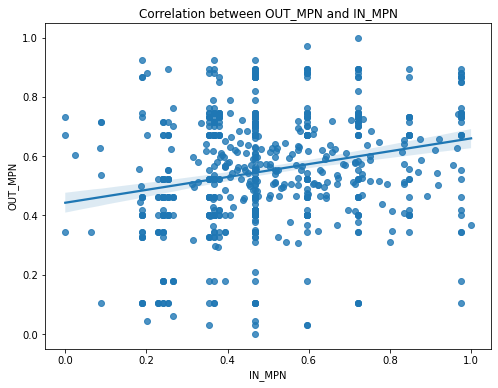

In [ ]:
xc = "IN_MPN" #@param ['MonthCount', 'Date', 'MLD', 'IN_PH', 'IN_TSS', 'IN_COD', 'IN_BOD', 'IN_MPN', 'OUT_PH', 'OUT_DO', 'OUT_TSS', 'OUT_COD', 'OUT_BOD', 'OUT_MPN']
yc = "OUT_MPN" #@param ['MonthCount', 'Date', 'MLD', 'IN_PH', 'IN_TSS', 'IN_COD', 'IN_BOD', 'IN_MPN', 'OUT_PH', 'OUT_DO', 'OUT_TSS', 'OUT_COD', 'OUT_BOD', 'OUT_MPN']
plotcorrelation(xc, yc)

NOW to treat outlier w.r.t
 correlation matrix

## 7. Linear Regression Model

In [ ]:
# DATA SPLITING
def split_data(df, ratio):
  train = pd.DataFrame(columns=df.columns) 
  test = pd.DataFrame(columns=df.columns)
  for i in range(1,27):
    temp = df[df["MonthCount"]==i]
    a, b = train_test_split(temp,test_size=ratio,random_state=42)
    train = train.append(a,ignore_index=True)
    test = test.append(b,ignore_index=True)
    
  return train, test
  

In [ ]:
xc = ["70:30", "80:20"]
yc  = ycols
linear_matrix = pd.DataFrame(columns=yc, index=xc)
linear_matrix
correlation_matrix = pd.DataFrame(columns=yc, index=xc)



In [ ]:
df_new = df4.drop(["MonthCount"],axis=1)
corr = df_new.corr()

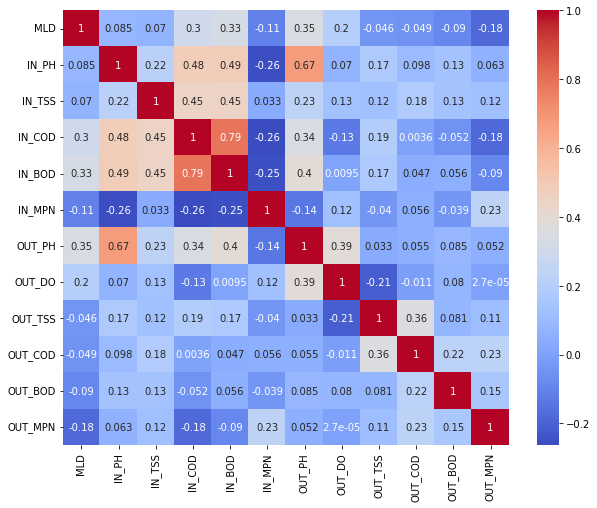

In [ ]:
# heatmap correlation
import seaborn as sb
plt.figure(figsize = (10,8))
ax = sb.heatmap(corr, cmap="coolwarm", annot=True)
plt.savefig('heatmap.png', dpi = 200)

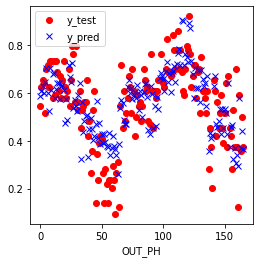

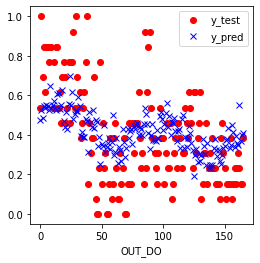

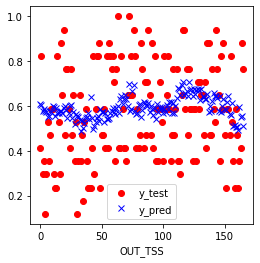

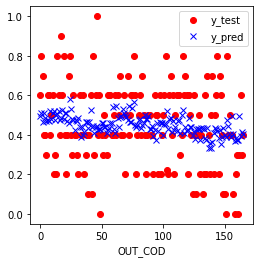

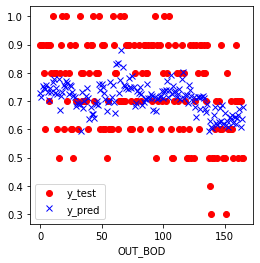

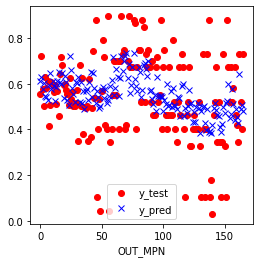

In [ ]:
ratios = [0.2,0.3]
dict_ratio = { 0.2 : "80:20", 0.3 : "70:30"}
i = 0
for ratio in ratios:
  train, test = split_data(df4,ratio)
  for column in ycols:
    X_train, X_test, Y_train, Y_test = train[xcols], test[xcols], train[column], test[column]
    LR = LinearRegression()
    LR.fit(X_train,Y_train)
    y_pred = LR.predict(X_test)
    linear_matrix.at[dict_ratio[ratio], column] = MSE(Y_test, y_pred )
    correlation_matrix.at[dict_ratio[ratio], column], useless = pearsonr(Y_test, y_pred)
    if ratio == 0.2 and i<6:
      plt.figure(figsize=(4,4))
      # plt.title(column)
      plt.xlabel(column)
      # plt.ylabel("Y-Pred")
      plt.plot(Y_test,"ro",label = "Y-Test")
      plt.plot(y_pred,"bx",label="Y-Pred")
      plt.legend(["y_test","y_pred"],loc="best")
      m,b = np.polyfit(Y_test, y_pred, 1)
      plt.savefig('/content/drive/MyDrive/resources/linearRegressionPred/'+column+'_LR.png', dpi = 200)
      #plt.plot(Y_test, Y_test * m + b)
    """
    #print("Score \n=",LR.score(X_test, Y_test))
    #plotting a graph
    plotx = np.arange(0,y_pred.shape[0],1)
    plt.plot(plotx, y_pred,"rx")
    plt.plot(plotx, Y_test,"bo")
    plt.legend(["y_pred","y_test"],loc="best")
    plt.xlabel("X axis")
    plt.ylabel(column)
    plt.show()
    """


In [ ]:
linear_matrix

In [ ]:
correlation_matrix

In [ ]:
#plotting a graph
plotx = np.arange(0,y_pred.shape[0],1)
plt.plot(plotx, y_pred,"rx")
plt.plot(plotx, Y_test,"bo")
plt.legend(["y_pred","y_test"],loc="best")
plt.xlabel("X axis")
plt.ylabel(column)
plt.show()


In [ ]:

for i in range(6):
  plt.subplot(3,2,i+1)
  plt.plot()

#8. ANN model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error as mse

In [ ]:
predictors = df4[xcols].copy()
target = df4[ycols].copy()

In [ ]:
n_cols = predictors.shape[1]#no. of columns for input layers
n_cols

In [ ]:
tar_cols = target.shape[1]
tar_cols

In [ ]:
def regression_model():
  model = Sequential()
  model.add((Dense(10, activation="relu",input_shape=(n_cols, ))))
  model.add((Dense(10, activation="relu"))) #Hidden Layer = 1
  model.add((Dense(tar_cols)))
  model.compile(optimizer = "adam", loss= "mean_squared_error")
  return model



In [ ]:
def solve(n, e):
  mse_list = []
  for i in range(n):
    train, test = split_data(df4)
    X_train, X_test, Y_train, Y_test = train[xcols], test[xcols], train[ycols], test[ycols]
    model.fit(X_train, Y_train, validation_split=0.30, epochs=e, verbose=0)
    print("\n\nModel trained for instance {}\n\n".format(i+1))
    y_pred = model.predict(X_test)
    mse_i = mse(Y_test, y_pred)
    mse_list.append(mse_i)
  mn = np.mean(mse_list)
  stdev = np.std(mse_list)
  print(mn, stdev)

In [ ]:
model = regression_model()
solve(1,20)

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save("modeldam")

In [ ]:
model = keras.models.load_model("modeldam")

In [ ]:
#df4.to_csv("Finalset.csv",encoding="utf-8",index=False)
#files.download("Finalset.csv")

In [ ]:
#importing libraries
import pandas as pd               
import io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Finalset.csv")
data.head()

In [ ]:
l = len(data["MLD"])
np.random.seed(0)

In [ ]:
#shuffling data
train_df = data.sample(frac=0.6)
rest = data.drop(train_df.index)
valid_df = rest.sample(frac=0.5)
test_df = rest.drop(valid_df.index)

In [ ]:
valid_df.describe()

In [ ]:
test_df.head(2)

In [ ]:
train_df.head(2)

In [ ]:
def divide(df,xcol, ycol):
  p = torch.Tensor(df[xcol].values.astype(np.float))
  t = torch.Tensor(df[ycol].values.astype(np.float))
  t = torch.reshape(t, (-1,1))
  return p,t


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
xcols = ["MLD","IN_PH","IN_TSS", "IN_BOD","IN_COD","IN_MPN"]
ycols = ["OUT_PH","OUT_DO","OUT_TSS"	,"OUT_COD"	,"OUT_BOD", "OUT_MPN"]

In [ ]:
predictor_train, target_train = divide(train_df, xcols, ycols[-1])
target_train[0:2]

In [ ]:
train_ds = TensorDataset(predictor_train, target_train)
train_dl = DataLoader(train_ds, batch_size=5,shuffle=True)


In [ ]:
model1 = nn.Linear(6,1)

In [ ]:
opt = torch.optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
import torch.nn.functional as F
loss_fn = F.mse_loss

In [ ]:
def pr(x, y):
  vx = x - torch.mean(x)
  vy = y - torch.mean(y)
  return (torch.sum(vx*vy) +/ ( (torch.sqrt(torch.sum(vx**2))* torch.sqrt(torch.sum(vy**2))) + 1e-4)

In [ ]:
def fit(model, opt,loss_fn, dl,pred,tar, num_epochs):
  loss_list = []
  for epoch in range(num_epochs):
    cost = 0
    for xb, yb in dl:
      y_pred = model(xb)
      loss = loss_fn(y_pred, yb)
      cost += loss
      loss.backward()
      opt.step()
      opt.zero_grad()
    loss_list.append(cost)
  y_fin = model(pred)
  return loss_fn(y_fin,tar),pr(tar, y_fin)
  """plt.figure(figsize=(8,5))
  plt.title("Cost vs Epoch")
  plt.ylabel("Cost")
  plt.xlabel("Epoch")
  plt.plot(loss_list)
  plt.show()"""

In [ ]:
predictor, target = divide(valid_df, xcols, ycols[-1])

In [ ]:
fit(model1, opt, loss_fn, train_dl,predictor, target ,10)

In [ ]:
lrs = [0.001,0.005]
epochss = [20,50]
hidden_layers = [6,7,8]
optimize_list = [1,2] #1:SGD, 2:Adam


In [ ]:

yc = ["Batch_size", "Neurons", "Epochs", "Learning_Rate", "Optimizer","Cost"]
xc = ycols
matrix = pd.DataFrame(index=xc, columns = yc)
neuron = 0
hlr = 0
epc = 0
tcost = 1
batch_size = 1
optimizer = "SGD"

In [ ]:
matrix

In [ ]:
ind = [6,7,8] 
yc = ycols
ann_matrix_mse = pd.DataFrame(columns=yc, index=ind)
ann_matrix_corr = pd.DataFrame(columns=yc, index=ind)
test_mse = pd.DataFrame(columns=yc, index=ind)
test_corr = pd.DataFrame(columns=yc, index=ind)

In [ ]:
for col in ["OUT_COD"]:
  ptrain, ttrain = divide(train_df, xcols,col)
  pvalid, tvalid = divide(valid_df, xcols, col) 
  train_ds = TensorDataset(ptrain, ttrain)
  for i in ind:
    train_dl = DataLoader(train_ds,batch_size=1,shuffle=True)
    model2 = nn.Sequential(nn.Linear(6,i), nn.Sigmoid(), nn.Linear(i,1),nn.ReLU())
    opt = torch.optim.Adam(model2.parameters(),lr = 0.001)
    loss_fn = F.mse_loss
    fn_cost, cor = fit(model2, opt, loss_fn, train_dl, pvalid, tvalid, 20)
    ann_matrix_mse.at[i, col] = fn_cost.detach().numpy()
    ann_matrix_corr.at[i, col] = cor.detach().numpy()


In [ ]:
ann_matrix_mse

In [ ]:
ann_matrix_corr

In [ ]:
for col in ycols:
  ptrain, ttrain = divide(train_df, xcols,col)
  ptest, ttest = divide(test_df, xcols, col) 
  train_ds = TensorDataset(ptrain, ttrain)
  for i in ind:
    train_dl = DataLoader(train_ds,batch_size=1,shuffle=True)
    model2 = nn.Sequential(nn.Linear(6,i), nn.Sigmoid(), nn.Linear(i,1),nn.ReLU())
    opt = torch.optim.Adam(model2.parameters(),lr = 0.001)
    loss_fn = F.mse_loss
    fn_cost, cor = fit(model2, opt, loss_fn, train_dl, pvalid, tvalid, 20)
    test_mse.at[i, col] = fn_cost.detach().numpy()
    test_corr.at[i, col] = cor.detach().numpy()

In [ ]:
test_mse

In [ ]:
test_corr

In [ ]:
for col in xc:
  ptrain, ttrain = divide(train_df, xcols,col)
  pvalid, tvalid = divide(valid_df, xcols, col) 
  train_ds = TensorDataset(ptrain, ttrain)
  neuron = 1
  hlr = 0.001
  epc = 1
  tcost = 1
  batch_size = 1
  
  for i in hidden_layers:
  
    for j in epochss:
  
      for k in lrs:
  
        for b in optimize_list:

          train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)
          model2 = nn.Sequential(nn.Linear(6,i), nn.ReLU(), nn.Linear(i,1))
          if b==1:
            opt = torch.optim.SGD(model2.parameters(),lr = k,)
          else:
            opt = torch.optim.Adam(model2.parameters(),lr = k)
          loss_fn = F.mse_loss
          fncost = fit(model2,opt,loss_fn, train_dl,pvalid,tvalid,j)
  
          if fncost < tcost:
            neuron = i
            epc = j
            hlr = k
            tcost = fncost
            optimizer = "SGD" if b==1 else "Adam"

  matrix.at[col,"Neurons"] = neuron
  matrix.at[col,"Epochs"] = epc
  matrix.at[col,"Learning_Rate"] = hlr
  matrix.at[col, "Batch_size"] = batch_size
  matrix.at[col, "Cost"] = tcost.detach().numpy()
  matrix.at[col, "Optimizer"] = optimizer

matrix



In [ ]:
def fit_plot(model, opt,loss_fn, dl, pred, tar, num_epochs):
  loss_list = []
  orig_y = []
  predict_y = []
  for epoch in range(num_epochs):
    cost = 0
    for xb, yb in dl:
      y_pred = model(xb)
      predict_y.append(y_pred.detach().numpy())
      orig_y.append(yb.detach().numpy())
      loss = loss_fn(y_pred, yb)
      cost += loss
      loss.backward()
      opt.step()
      opt.zero_grad()
    loss_list.append(cost)
  
  plt.figure(figsize=(4,2))
  plt.title("Cost vs Epoch")
  plt.ylabel("Cost")
  plt.xlabel("Epoch")
  plt.plot(loss_list)
  """
  plt.figure(figsize=(4,3))
  plt.plot(orig_y,"rx", predict_y, "bo")
  plt.legend(["y_test","y_predict"],loc="best")
  """
  plt.show()
  return loss_fn(model(pred),tar)

In [ ]:
cols = "OUT_DO" #@param ["OUT_PH","OUT_DO","OUT_TSS"	,"OUT_COD"	,"OUT_BOD", "OUT_MPN"]
for col in ["OUT_MPN"]:
  neuron = matrix.at[col,"Neurons"]
  epc = matrix.at[col,"Epochs"] 
  hlr = matrix.at[col,"Learning_Rate"] 
  batch_size = matrix.at[col, "Batch_size"]  
  tcost = matrix.at[col, "Cost"]
  optimizer = matrix.at[col, "Optimizer"]
  train_dl = DataLoader(train_ds, batch_size,shuffle=True)
  final_model = nn.Sequential(nn.Linear(6,neuron), nn.ReLU(), nn.Linear(neuron,1))
  if optimizer == "SGD":
    opt = torch.optim.SGD(final_model.parameters(),lr= hlr)
  else:
    opt = torch.optim.Adam(final_model.parameters(),lr= hlr)
  loss_fn = F.mse_loss
  ptest,ttest = divide(test_df,xcols,col)
  error = fit_plot(final_model,opt,loss_fn,train_dl,ptest, ttest,epc)
  print("Validation Error = {}\nTest Error = {}".format(tcost,error))

In [ ]:
training test = 70:30
